In [2]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [3]:
m = np.arange(12).reshape((3,4))
#print("m:\n", m)

print("\nGlobal mean:", m.mean())
print("\nMeans for colums", m.mean(0))
print("\nMeans for rows:", m.mean(1))


Global mean: 5.5

Means for colums [4. 5. 6. 7.]

Means for rows: [1.5 5.5 9.5]


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [4]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print("u:", u, "\nv:", v)

outer1 = np.outer(u, v)
outer2 = np.array([[i*j for i in v] for j in u])
outer3 = u[:, np.newaxis]*v

print("\nOuter product with the function outer in numpy:\n", outer1)
print("\nOuter product with list comprehension:\n", outer2)
print("\nOuter product with numpy broadcasting operatoins:\n", outer3)

u: [1 3 5 7] 
v: [2 4 6 8]

Outer product with the function outer in numpy:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

Outer product with list comprehension:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

Outer product with numpy broadcasting operatoins:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [5]:
M = np.random.random((10, 6))
print("10 by 6 matrix of random uniform numbers:\n", M)

M[M<0.1] = 0
print("\nFinal filterd Matrix:\n", M)

10 by 6 matrix of random uniform numbers:
 [[0.45348414 0.49136958 0.95050602 0.18258777 0.91920214 0.98166704]
 [0.78443996 0.61973151 0.08864191 0.48577379 0.98042201 0.59672416]
 [0.16194136 0.68530406 0.76868694 0.51739994 0.14510048 0.54981021]
 [0.64201155 0.38023914 0.28046858 0.38955252 0.99953552 0.77499834]
 [0.47307266 0.40133796 0.95437191 0.34117863 0.75815385 0.23615495]
 [0.41813389 0.47917973 0.21669126 0.04131687 0.34179715 0.14542235]
 [0.25911241 0.44275135 0.8969636  0.10070162 0.32411349 0.3207538 ]
 [0.1794379  0.24183481 0.22163613 0.32487806 0.80716166 0.3003322 ]
 [0.32724356 0.80597985 0.02627595 0.45245726 0.28659797 0.38676345]
 [0.16995535 0.7174353  0.45974024 0.02411047 0.51806099 0.89722943]]

Final filterd Matrix:
 [[0.45348414 0.49136958 0.95050602 0.18258777 0.91920214 0.98166704]
 [0.78443996 0.61973151 0.         0.48577379 0.98042201 0.59672416]
 [0.16194136 0.68530406 0.76868694 0.51739994 0.14510048 0.54981021]
 [0.64201155 0.38023914 0.28046858 

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

In [6]:
from math import pi
m2 = np.linspace(0, 2*pi, 100)
m2_inverse = m2[::-1]
m2_filter = m2[ np.absolute(np.sin(m2)-np.cos(m2)) < 0.1]

print("Linspace array:\n", m2)
print("\nLinspace inverted array:\n", m2_inverse)
#print("\nLinspace sine array:\n", np.sin(m2))
#print("\nLinspace cosine array:\n", np.cos(m2))
#print("\nLinspace |cosine-sine| array:\n", np.absolute(m2_sin-m2_cos))
print("\nLinspace filtered |cosine-sine| array:\n", m2_filter)

Linspace array:
 [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.

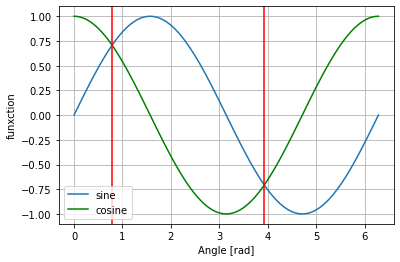

In [7]:
import matplotlib.pylab as plt

plt.plot(m2, np.sin(m2), label="sine")
plt.plot(m2, np.cos(m2), "g", label="cosine")
plt.legend(loc="lower left")
plt.xlabel('Angle [rad]')
plt.ylabel('funxction')
plt.axis('tight')
plt.axvline(x=pi/4, c="r")       # They are the same at pi/4 
plt.axvline(x=5/4*pi, c="r")     # and at 5/4*pi
plt.grid()
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [8]:
x = np.arange(1, 11)
m3 = np.outer(x, x)

print("10 by 10 multiplication table's matrix:\n", m3)
print("\nTrace:", np.trace(m3))
print("\nAnti-diagonal:", np.fliplr(m3).diagonal())
print("\nDiagnoal offset by 1 upward:", np.diag(m3, 1))



10 by 10 multiplication table's matrix:
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]

Trace: 385

Anti-diagonal: [10 18 24 28 30 30 28 24 18 10]

Diagnoal offset by 1 upward: [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [9]:
dist = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

D = dist
for i in range(1, len(dist)):
    #print("\niteration =", i,"\ndist:\n", dist, "\nroll dist:\n", np.roll(dist, i))
    D = np.vstack((D,  np.roll(dist, i)))
    #print("\n", D)

print("2D grid of distances in miles:\n", D)

print("\n2D grid of distances in km:\n", D*1.609344)

2D grid of distances in miles:
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [2448    0  198  303  736  871 1175 1475 1544 1913]
 [1913 2448    0  198  303  736  871 1175 1475 1544]
 [1544 1913 2448    0  198  303  736  871 1175 1475]
 [1475 1544 1913 2448    0  198  303  736  871 1175]
 [1175 1475 1544 1913 2448    0  198  303  736  871]
 [ 871 1175 1475 1544 1913 2448    0  198  303  736]
 [ 736  871 1175 1475 1544 1913 2448    0  198  303]
 [ 303  736  871 1175 1475 1544 1913 2448    0  198]
 [ 198  303  736  871 1175 1475 1544 1913 2448    0]]

2D grid of distances in km:
 [[   0.        318.650112  487.631232 1184.477184 1401.738624 1890.9792
  2373.7824   2484.827136 3078.675072 3939.674112]
 [3939.674112    0.        318.650112  487.631232 1184.477184 1401.738624
  1890.9792   2373.7824   2484.827136 3078.675072]
 [3078.675072 3939.674112    0.        318.650112  487.631232 1184.477184
  1401.738624 1890.9792   2373.7824   2484.827136]
 [2484.827136 3078.675072 3939.674

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [11]:
def isprime(x):
    check = False
    for iterat in range(2, x):
        if x%iterat != 0:
            check = True
        else: 
            check = False
            break
    return check


N = input("Maximum of number range: ")
N = int(N)+1


def arrayprime(n):
    
    num = np.arange(n)

    mask0 = (num!=0)
    num = num[mask0]    
    
    mask1 = (num!=1)
    num = num[mask1]

    vect_isprime = np.vectorize(isprime)
    mask3 = vect_isprime(num)
    num = num[mask3]

    return num

arrayprime(N)

Maximum of number range: 99


array([ 3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61,
       67, 71, 73, 79, 83, 89, 97])

In [17]:
'''def isprime(x):                                # Version 2
    check = False
    for iterat in range(2, x):
        if x%iterat != 0:
            check = True
        else: 
            check = False
            break
    return check


N = input("Maximum of number range: ")
N = int(N)+1


def arrayprime(n):
    num = np.arange(n)
    prime01 = []

    mask0 = (num!=0)
    num = num[mask0]
    #print("\n", num)    
    
    
    mask1 = (num!=1)
    #print("\n", mask1)
    #print(np.all(mask1))
    if np.all(mask1) == False: prime01.append(1)    # The only change is here: in this case we consider 
    num = num[mask1]                                # one 1 to be a prime number (it's not).
    #print("\n", prime01)                           # -> in this way we keep it!


    vect_isprime = np.vectorize(isprime)
    mask3 = vect_isprime(num)
    num = num[mask3]
    #print("\n", num)

    prime01 = np.array(prime01)

    return np.concatenate((prime01, num))

arrayprime(N)'''

'def isprime(x):                                # Version 2\n    check = False\n    for iterat in range(2, x):\n        if x%iterat != 0:\n            check = True\n        else: \n            check = False\n            break\n    return check\n\n\nN = input("Maximum of number range: ")\nN = int(N)+1\n\n\ndef arrayprime(n):\n    num = np.arange(n)\n    prime01 = []\n\n    mask0 = (num!=0)\n    num = num[mask0]\n    #print("\n", num)    \n    \n    \n    mask1 = (num!=1)\n    #print("\n", mask1)\n    #print(np.all(mask1))\n    if np.all(mask1) == False: prime01.append(1)    # The only change is here: in this case we consider \n    num = num[mask1]                                # one 1 to be a prime number (it\'s not).\n    #print("\n", prime01)                           # -> in this way we keep it!\n\n\n    vect_isprime = np.vectorize(isprime)\n    mask3 = vect_isprime(num)\n    num = num[mask3]\n    #print("\n", num)\n\n    prime01 = np.array(prime01)\n\n    return np.concatenate((pri

In [16]:
for n in range(1000,10000,1000):
    print("\nPrime numbers in the 0 -", n, "range.\nPerformance:")
    %timeit arrayprime(N)


Prime numbers in the 0 - 1000 range.
Performance:
783 µs ± 35.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Prime numbers in the 0 - 2000 range.
Performance:
767 µs ± 17.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Prime numbers in the 0 - 3000 range.
Performance:
764 µs ± 17.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Prime numbers in the 0 - 4000 range.
Performance:
769 µs ± 24.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Prime numbers in the 0 - 5000 range.
Performance:
775 µs ± 23 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Prime numbers in the 0 - 6000 range.
Performance:
768 µs ± 24.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Prime numbers in the 0 - 7000 range.
Performance:
818 µs ± 155 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Prime numbers in the 0 - 8000 range.
Performance:
1.12 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

Prime numbers in t

The performance (timeit) seems to scale by a 4/3 factor when we approximately octuple the N maximum of numbers range. This will surely change and result may vary in each itarations.

In [14]:
N = input("Maximum of number range: ")
N = int(N)+1

def PartialEratosthenes(arr):
    #print(arr)
    first = arr[0]
    #print(first)
    mask = (arr % first != 0)
    #print(arr[mask])
    return(np.append(arr[mask], arr[0]))

def Eratosthenes(N):
    num = np.arange(N)

    mask0 = (num!=0)
    num = num[mask0]    
   
    mask1 = (num!=1)
    num = num[mask1]

    for i in range(N):
        if len(num)==len(PartialEratosthenes(num)): break
        num = PartialEratosthenes(num)
    return np.sort(num)

Eratosthenes(N)

Maximum of number range: 99


array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97])

In [15]:
%timeit Eratosthenes(N)

637 µs ± 49.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
